# **About Dataset**

# **Context**
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may **not** help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

# **Content**
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

# **Acknowledgements**
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

and I encountered it in '**Hands-On Machine learning with Scikit-Learn and TensorFlow**' by Aurélien Géron.

Aurélien Géron wrote:
`This dataset is a modified version of the California Housing dataset available from`:
Luís Torgo's page (University of Porto)

**NOTE:** I won't be copying the graphs in the book mentioned above. Just found this interesting, and thought I'd play with it! 95% of the graphs are made by my imagination!

In [1]:
# Load needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve 
print("Imported Needed Libraries 😅")

# Get the data
URL = "https://raw.githubusercontent.com/muhammadanas0716/Data-Science-Projects---EDA/main/9.%20California%20Housing%20Prices%20-%20Analysis/housing.csv"
california_df = pd.read_csv(URL)

print("Data Imported Successfully 🚀")

Imported Needed Libraries 😅
Data Imported Successfully 🚀


# **As said in the dataset about section, this dataset needs to be cleaned a lot, so we'll do that first.**

# **Once we're done with that, we shall move towards the visualization of our data!**


In [2]:
# Get the first 5 rows of data
california_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Get the last 5 rows of data
california_df.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
# Some info about the dataset
california_df.info()

# ||ANALYSIS||
# We see that the total_bedrooms has a few NULL(MISSING) values. And the variable ocean_proximity is a string, rather than a float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Some description about the dataset
california_df.describe()

# ||ANALYSIS||
# Just a few columns dicating the mean, standard devation and showing the 25th, 50th and 75th percentile. 
# As well the smallest and largest value in each category

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# Get the Null values in our dataset
pd.DataFrame(california_df.isnull().sum())

# ||ANALYSIS||
# total_bedrooms has 207 missing values, we shall deal with this below

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
# Fix the total_bedrooms, replace the NULL values with the MEAN or AVERAGE value, i.e 538
total_bedrooms_mean_value = california_df["total_bedrooms"].mean() # I could use 538 directly, but if this data gets updated somewhere in future, it could cause problems - FUTURE PROOFING
california_df["total_bedrooms"].replace(np.nan, total_bedrooms_mean_value, inplace  = True)

print("Successfully changed all NULL values to the mean value 😉")

Successfully changed all NULL values to the mean value 😉


In [8]:
# Calculating mean of every column
column_count = 0
for i in california_df.columns:
  print(f"The mean value of {i} ➡️ {california_df[i].mean()}")

  # Incrementing the Counter
  column_count += 1

  # This code block is to NOT print the mean value of the ocean_proximity as it is a STRING object
  if column_count == 9: # I have used 9 because there are 10 columns
    break 

The mean value of longitude ➡️ -119.56970445736432
The mean value of latitude ➡️ 35.63186143410853
The mean value of housing_median_age ➡️ 28.639486434108527
The mean value of total_rooms ➡️ 2635.7630813953488
The mean value of total_bedrooms ➡️ 537.8705525375617
The mean value of population ➡️ 1425.4767441860465
The mean value of households ➡️ 499.5396802325581
The mean value of median_income ➡️ 3.8706710029069766
The mean value of median_house_value ➡️ 206855.81690891474


In [9]:
# Get the count of every NEEDED column
columns_needed = ["ocean_proximity"] # You can add as many as YOU LIKE
for j in columns_needed:
  print(f"The mean value of {j} ➡️ \n{california_df[j].value_counts()}")
  print("➡️|||END|||➡️")

The mean value of ocean_proximity ➡️ 
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
➡️|||END|||➡️


# **Visualization**
I have analysed and visualised many relationships and connections between different columns to get interesting insights from our dataset.

## **What have I done?**

I have Explored the correlation & relationship between different data columns.

I have noted a few of the interesting insights from the exploratory analysis.

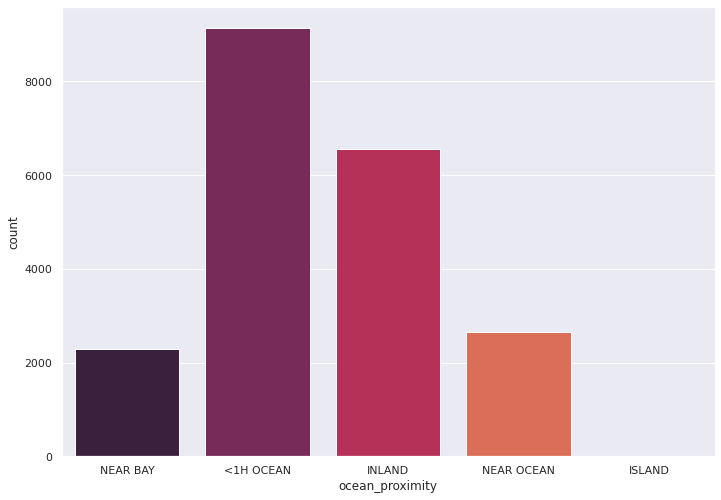

In [29]:
# Frequency of Ocean Proximity
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot
sns.countplot(data=california_df, x="ocean_proximity",  palette="rocket").set(
    title = "Frequency of Ocean Proximity",
    xlabel = "Distance of Ocean from the House",
    ylabel = "Frequency"
)

# Show
plt.show()

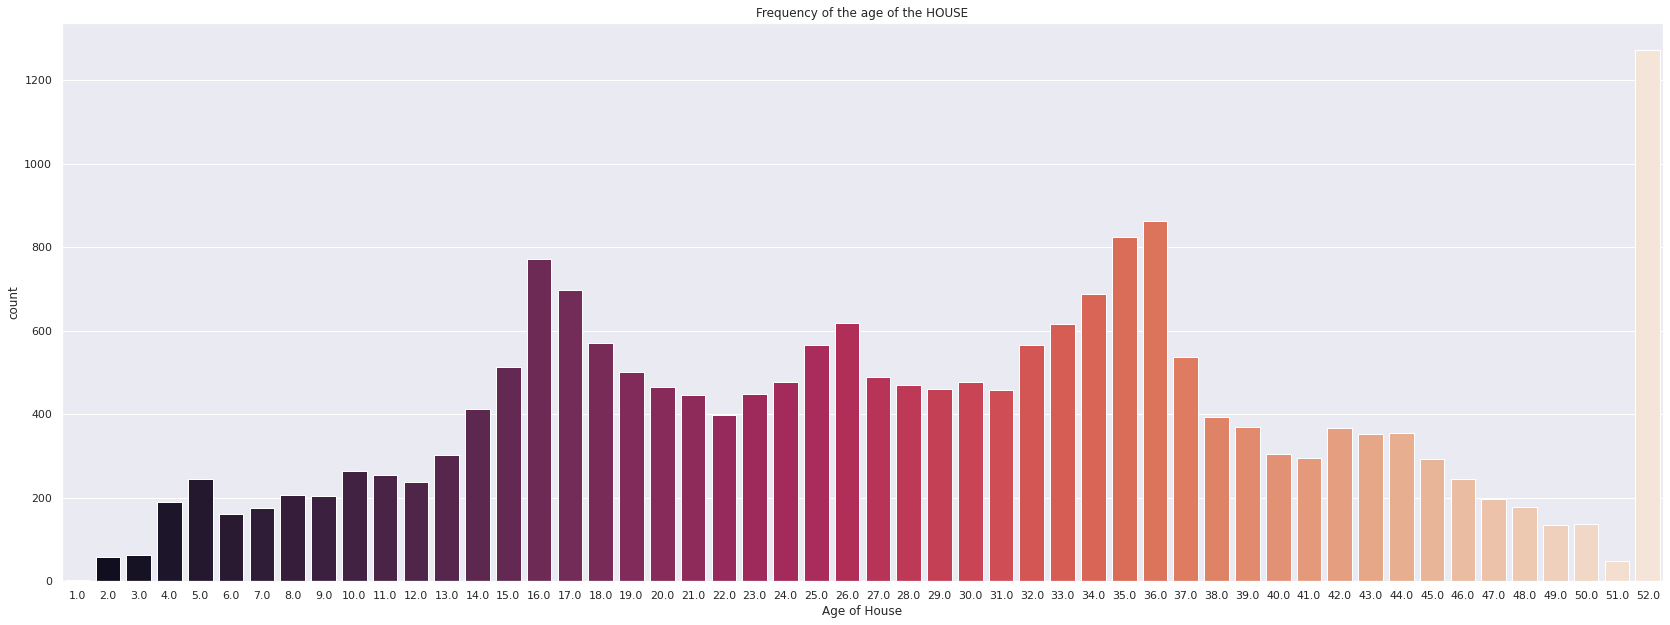

In [40]:
# Frequency of the age of the HOUSE
sns.set(rc={'figure.figsize':(28.7,10.27)})

# Plot
sns.countplot(data=california_df, x="housing_median_age",  palette="rocket").set(
    title = "Frequency of the age of the HOUSE",
    xlabel = "Age of House"
)

# Show
plt.show()

<Figure size 1800x1080 with 0 Axes>

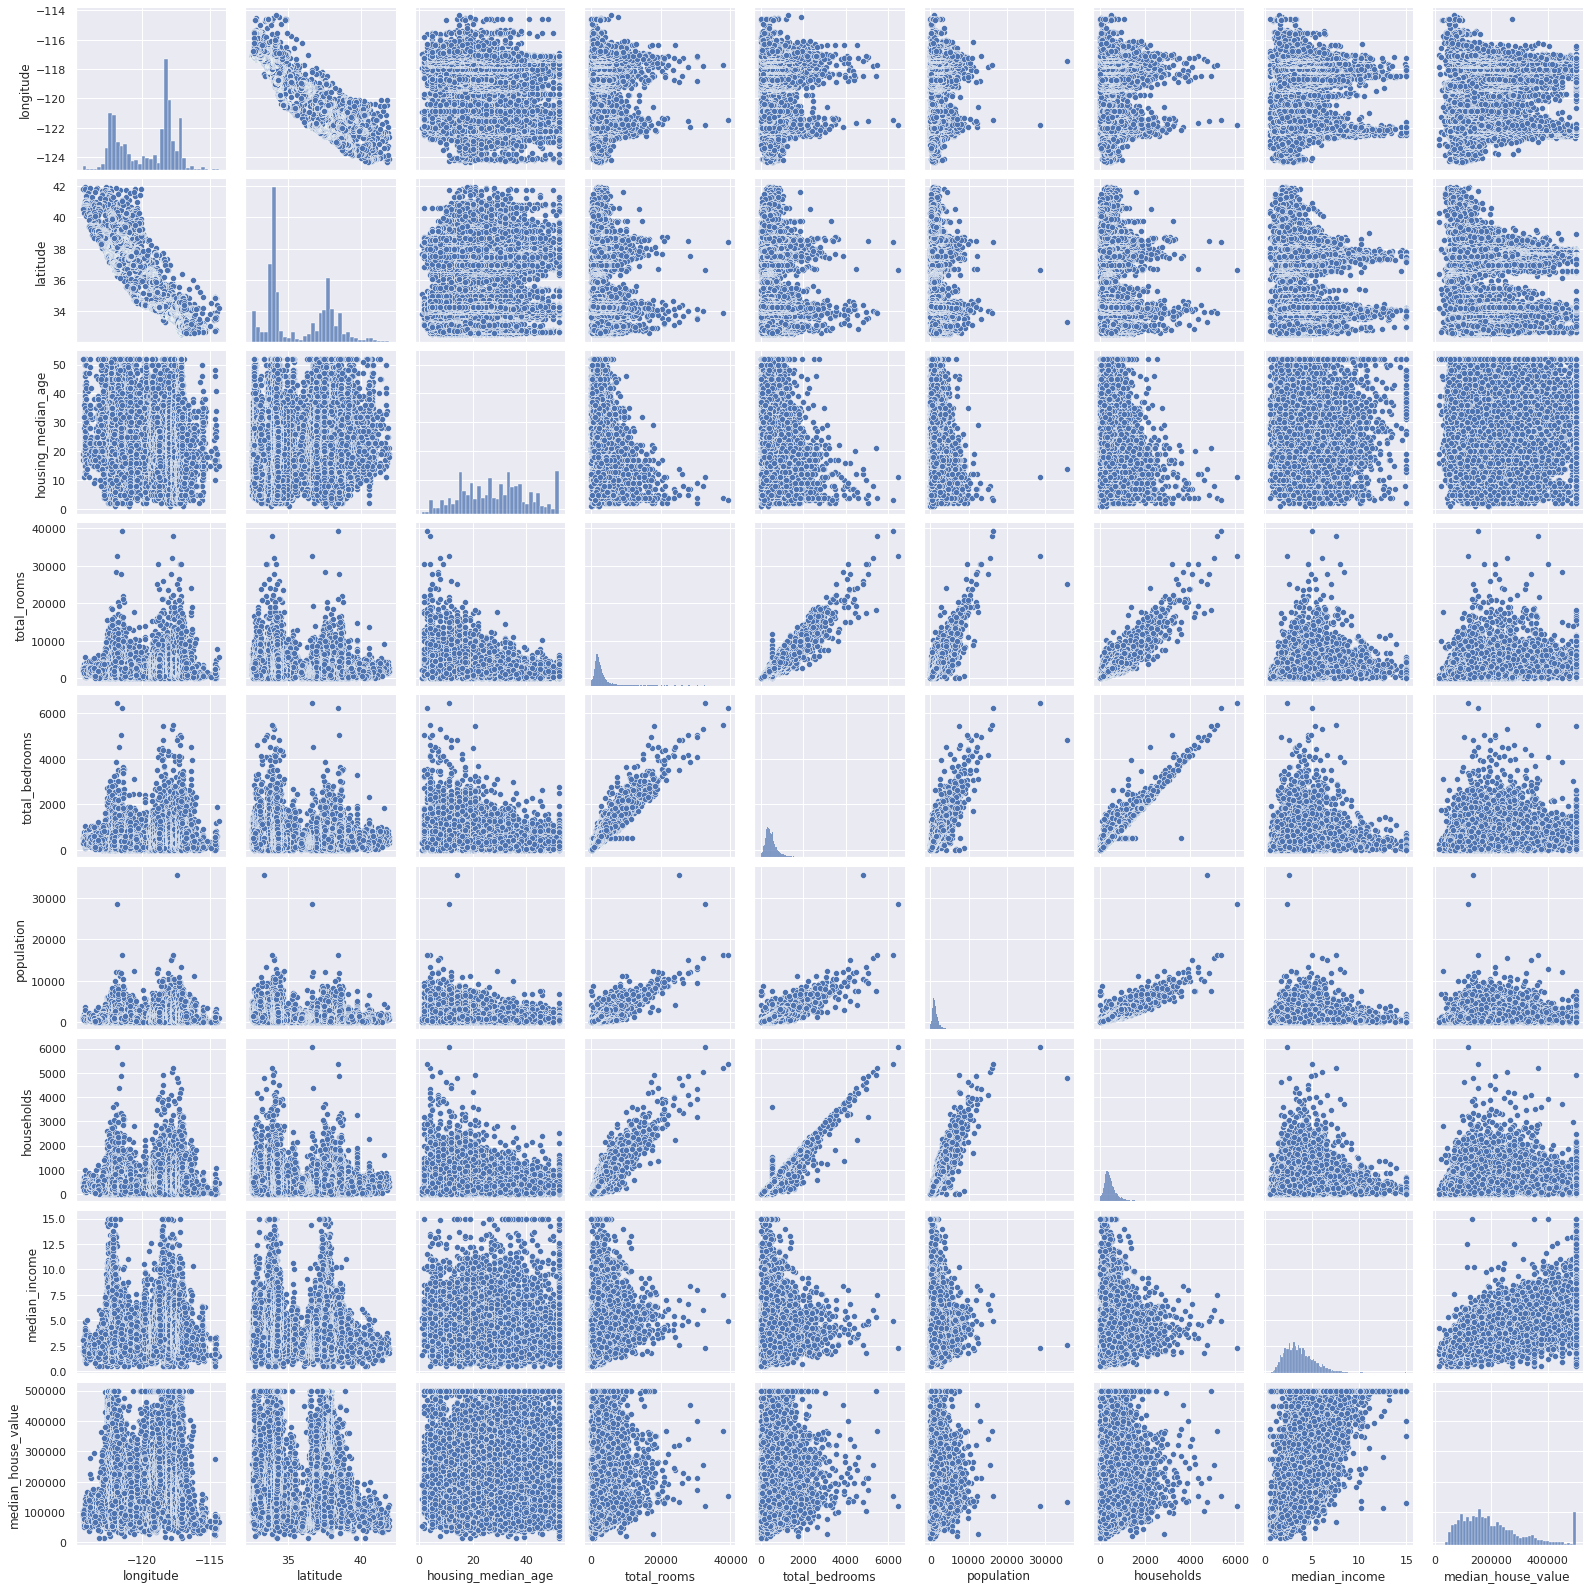

In [58]:
# Get pair values
plt.figure(figsize=(25,15))

# Plot
sns.pairplot(california_df)

# Sho
plt.show()

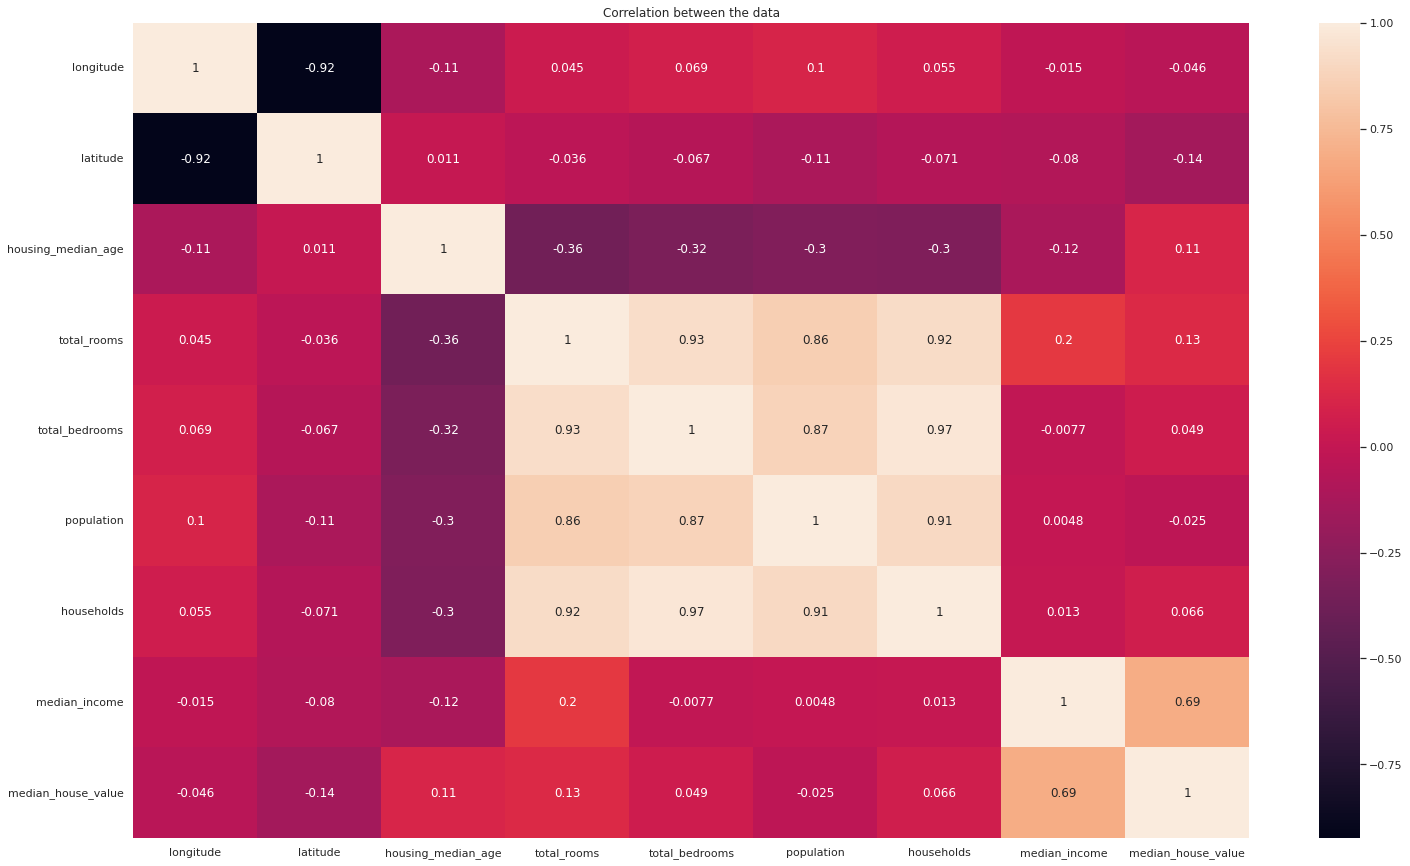

In [57]:
# Heatmap for obeserving correlations
plt.figure(figsize=(25,15))
california_heatmap = california_df.corr()

# Ploty 
sns.heatmap(california_heatmap, annot=True, cmap='rocket').set(
    title = "Correlation between the data"
)

# Show
plt.xticks(rotation=360)
plt.show()

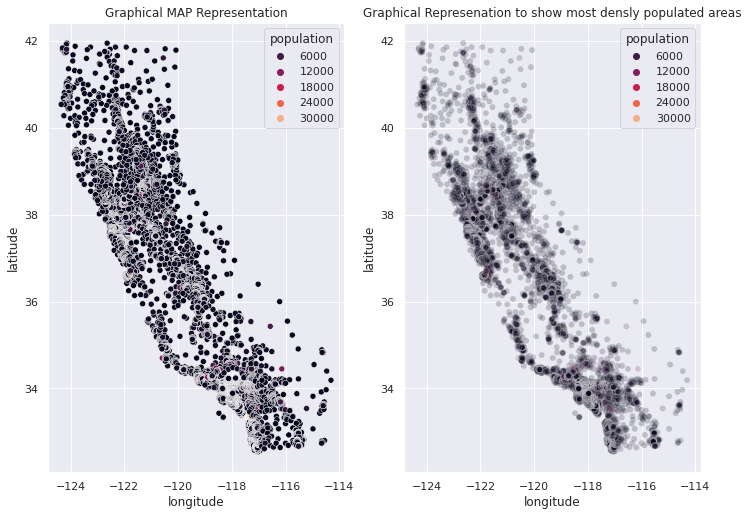

In [10]:
# Get the longitudinal & latitudinal graph
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, axes = plt.subplots(1, 2)

# Plot
sns.scatterplot(data=california_df, x="longitude", y="latitude", hue="population", ax=axes[0],  palette="rocket").set(
    title = "Graphical MAP Representation"
)
sns.scatterplot(data=california_df, x="longitude", y="latitude", hue="population", alpha=0.2, ax=axes[1],  palette="rocket").set(
    title = "Graphical Represenation to show most densly populated areas"
)

# Show 
plt.show()

# |||ANALYSIS|||
# We obeserve that the mostly densly populated areas are near San Diago & Los Angelos and San Fransisco. Very little population near and Las Vegas. City of Redding is also sparsely populated. 

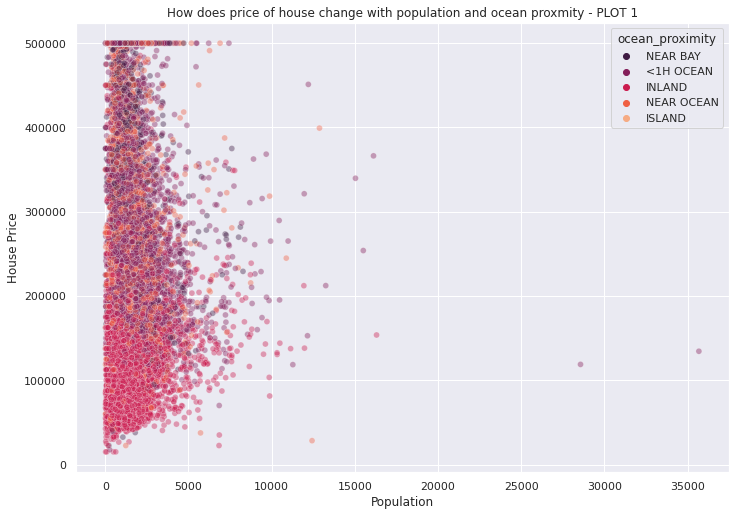

In [52]:
# The relation between the Ocean Proximity and Population - PLOT 1
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot
sns.scatterplot(data=california_df, x="population", y="median_house_value", hue="ocean_proximity", palette="rocket", alpha=0.4).set(
    title = "How does price of house change with population and ocean proxmity - PLOT 1",
    xlabel = "Population",
    ylabel = "House Price"
)
# Show 
plt.show()

# |||ANALYSIS|||
# We obeserve that most of the houses are Inland, with a price between 30,000 to 160,000. Most of the near bay and <1H Ocean as well as Near Ocean are around 300,000-500,000. Island seems to be in every price range.

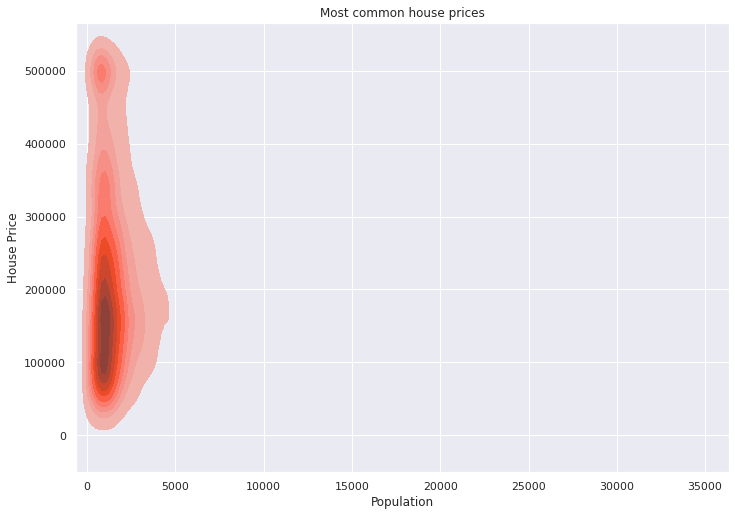

In [50]:
# The most common house prices
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot
sns.kdeplot(x='population', y='median_house_value', data=california_df, fill="True", color="salmon").set(
    title = "Most common house prices",
    xlabel = "Population",
    ylabel = "House Price"
)

# Show
plt.show()

# |||ANALYSIS|||
# We observe that mostly house prices in CA, lie between 50,000-280,000.

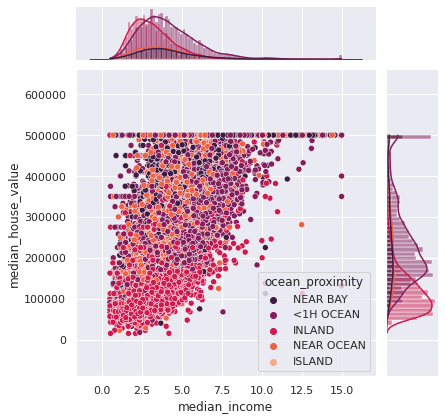

In [51]:
# How does income and ocean proximity affect the house price

# Plot 
m = sns.jointplot(data=california_df, x="median_income", y="median_house_value", hue="ocean_proximity", palette="rocket")
m.plot_marginals(sns.histplot, kde=True)

# Show
plt.show()

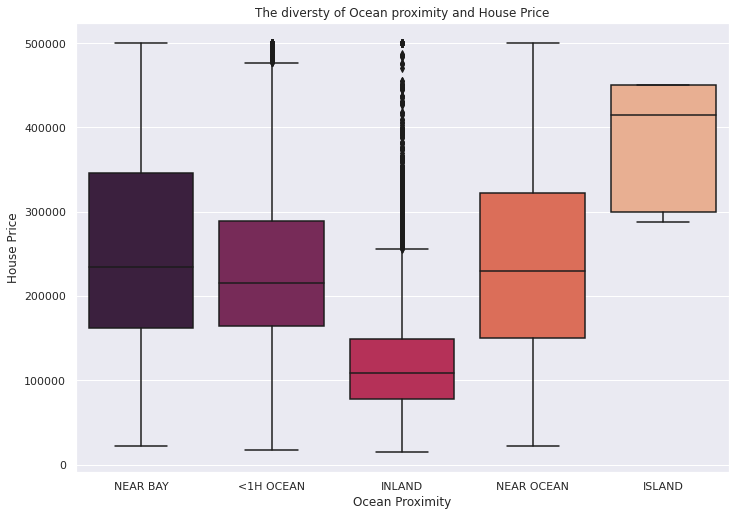

In [61]:
# The diversty of Ocean proximity and House Price
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(x='ocean_proximity',y='median_house_value',data=california_df, palette="rocket").set(
    title = "The diversty of Ocean proximity and House Price",
    xlabel = "Ocean Proximity",
    ylabel = "House Price"
)

# Show
plt.show()